# Discrete Event Simulation

As game actions are discrete events, they can be handled relatively efficiently by an event driven simulation.

In [1]:
from docplex.mp.model import Model

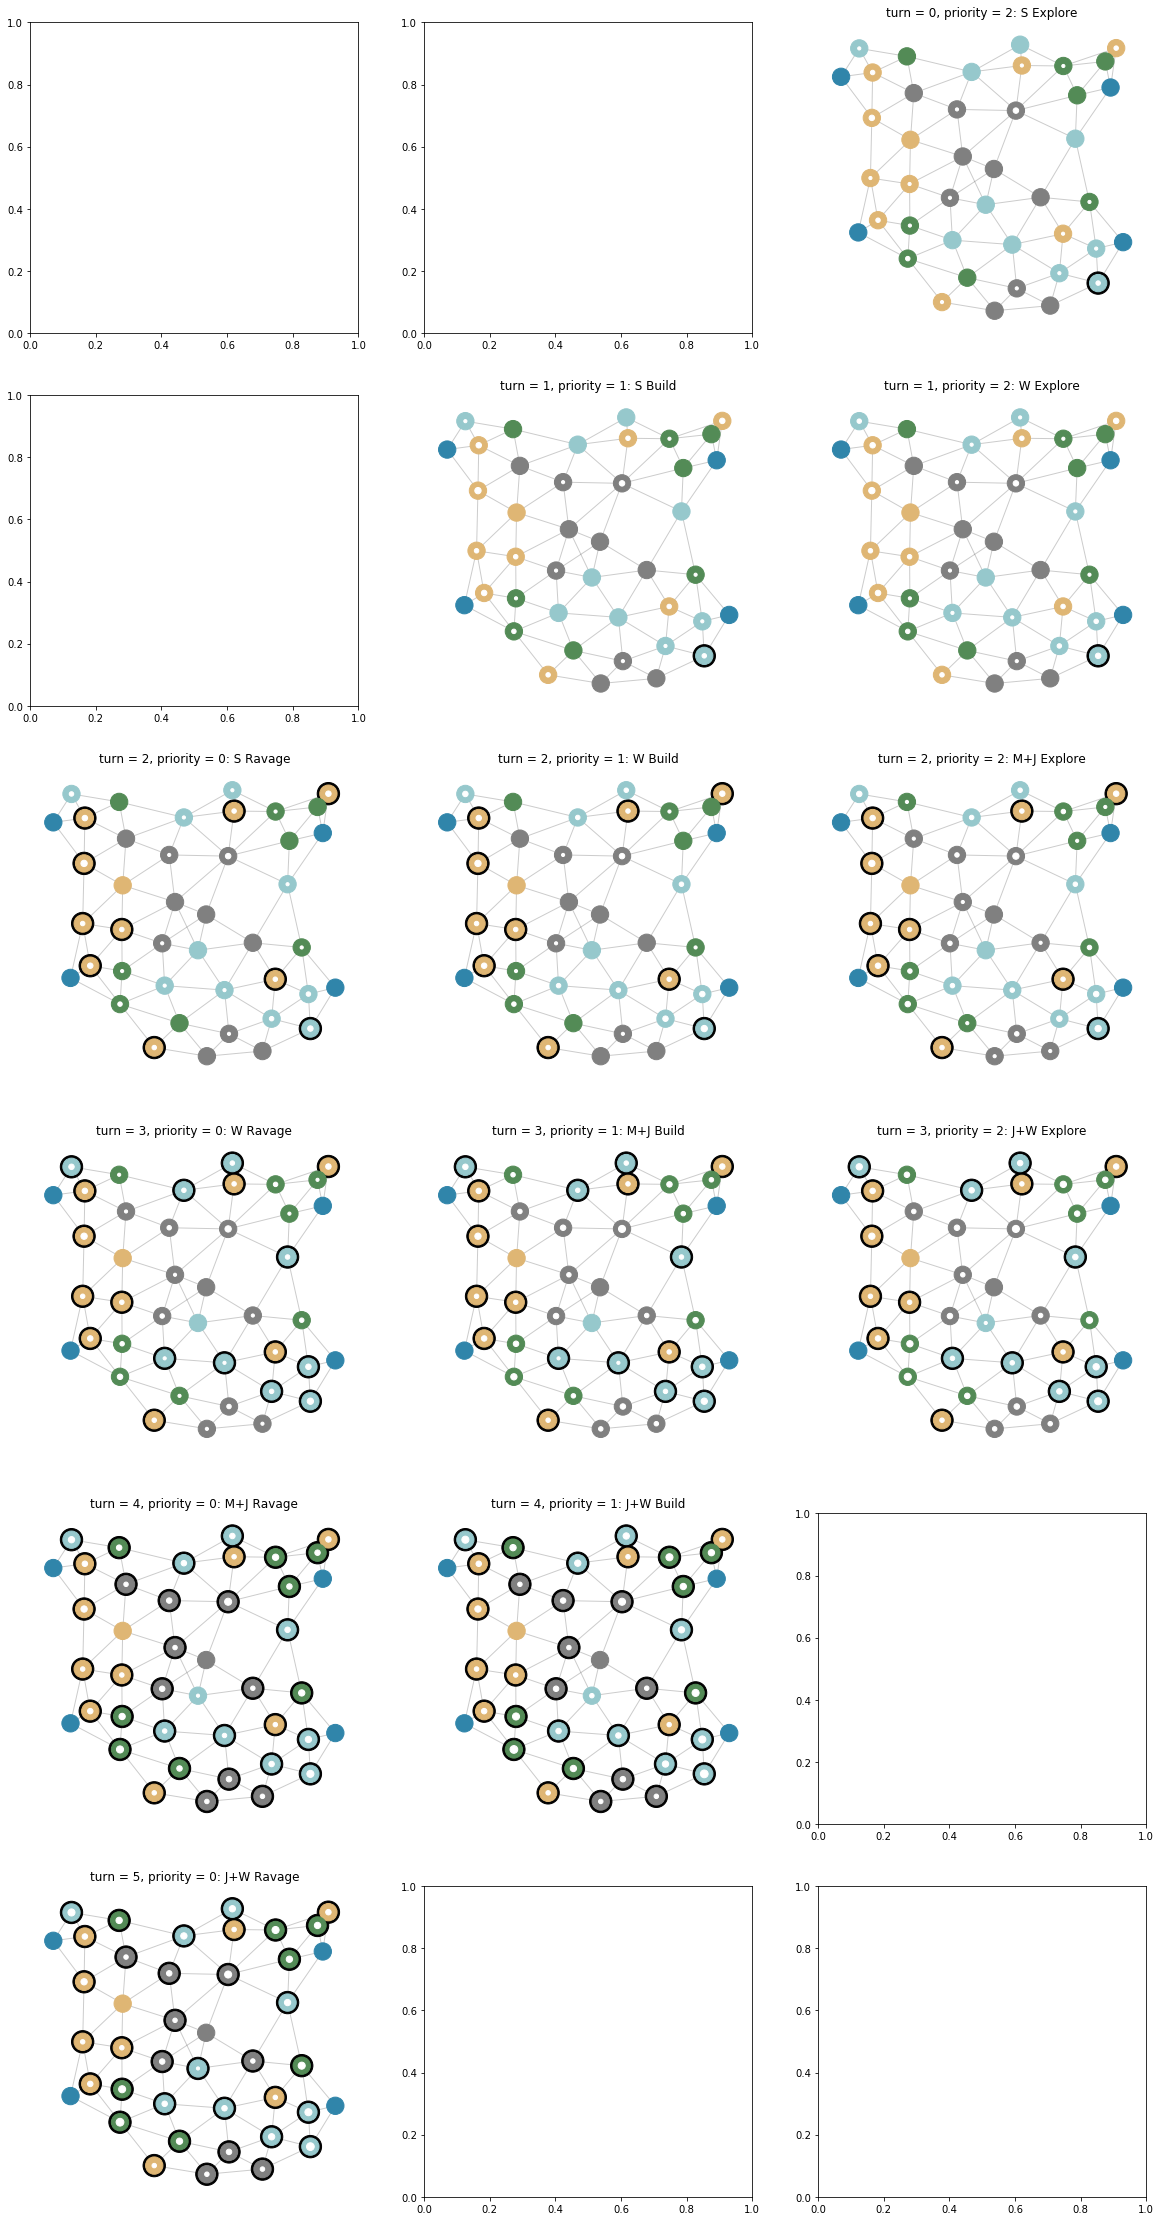

In [4]:
from queue import PriorityQueue
from matplotlib import pyplot as plt 
from components.actions.invader import Explore, Build, Ravage
from utils.boards import thematic

# Set up invader deck and thematic map
invader_deck = ['S', 'W', 'MJ', 'JW']
playthrough = thematic.copy()
# print(playthrough)

# Generate all events for the invader deck (lower number = higher priority)
queue = PriorityQueue()
for t, lands in enumerate(invader_deck):
    lands = list(lands)
    queue.put((t+0, 2, Explore(lands)))
    queue.put((t+1, 1, Build(lands)))
    queue.put((t+2, 0, Ravage(lands)))

fig, axs = plt.subplots(nrows=len(invader_deck)+2, ncols=3, figsize=(20, 40))

# Apply invader actions step by step
while not queue.empty():
    turn, priority, action = queue.get()
    playthrough = playthrough.apply(action)
    ax = axs[turn, priority]
    ax.set_title(f'turn = {turn}, priority = {priority}: ' + str(action))
    playthrough.draw(ax=ax)
    ax.axis('off')

# print(playthrough)